we'll explore how to use scikit-learn's GridSearchCV class to exhaustively search through every combination of hyperparameters until we find optimal values for a given model.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

## Load Datasets

In [2]:
# Import the data
df = pd.read_csv("/home/laaria/Desktop/REPOSITORIES/PRACTICE-NOTEBOOKS/DATA/winequality-red (1).csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## EDA

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


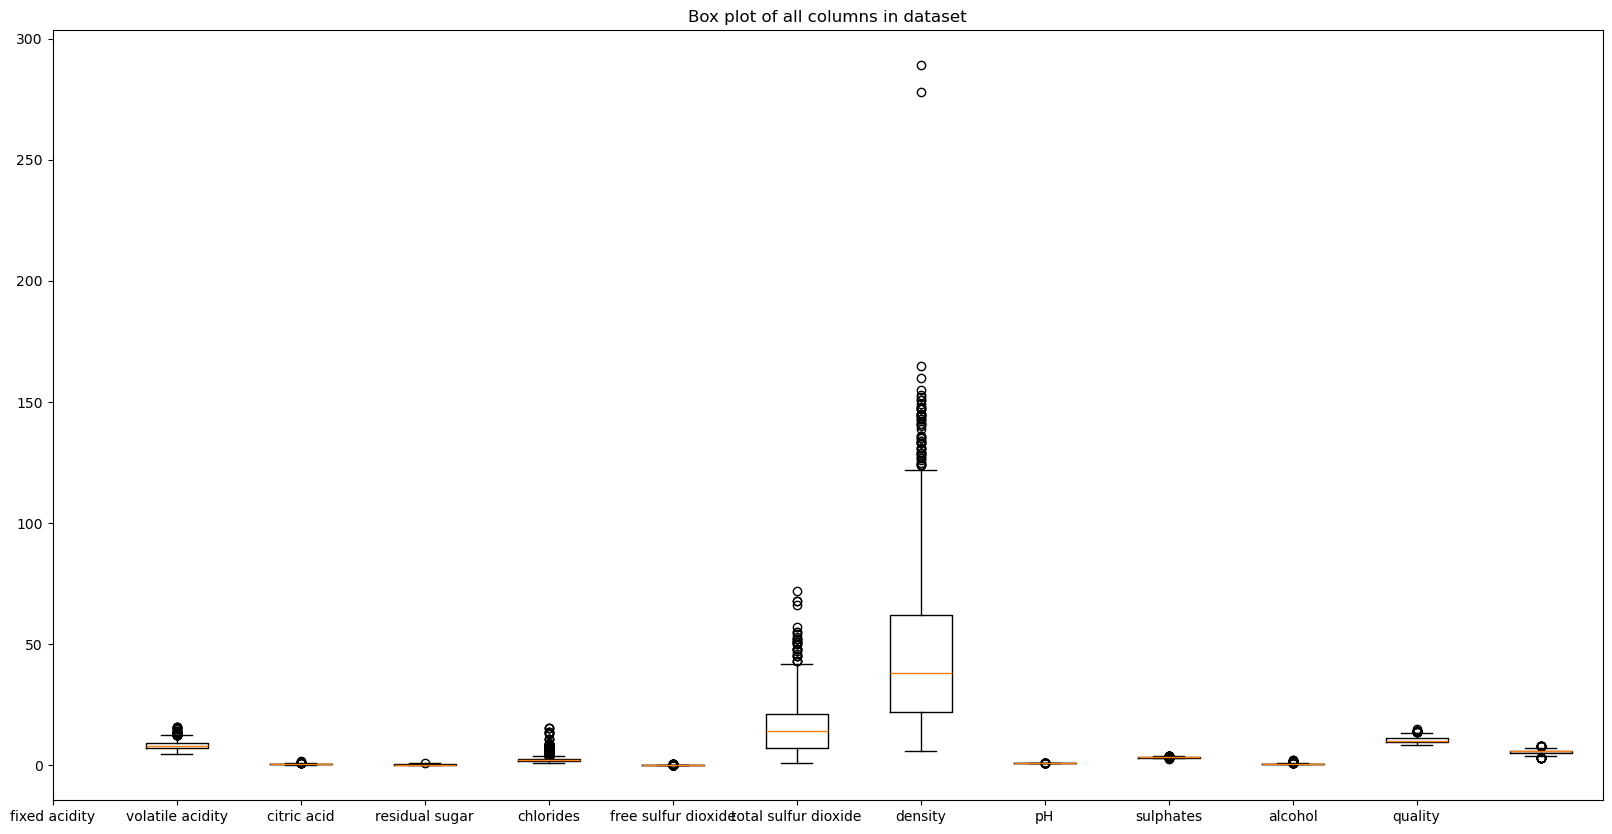

In [3]:
# Explore the dataset
display(df.describe())

# Create a box plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()

## Preprocessing our data


In [5]:
y = df["quality"]
X = df.drop("quality", axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Create a baseline model: Decision Trees

In [7]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 56.38%


In [8]:
print(
    """
Our model did poorly overall, but still significantly better than we 
would expect from random guessing, which would have ~10% accuracy.
"""
)


Our model did poorly overall, but still significantly better than we 
would expect from random guessing, which would have ~10% accuracy.



## Grid search: Decision trees

In [9]:
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}

Given our param_grid and the knowledge that we're going to use 3-fold cross-validation, how many different decision trees will GridSearchCV have to train in order to try every possible combination and find the best parameter choices?

In [10]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(
    f"Grid Search will have to search through {num_decision_trees} different permutations."
)

Grid Search will have to search through 648 different permutations.


Let's create our GridSearchCV object and fit it

In [12]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf,
                              dt_param_grid, 
                              cv=3, 
                              return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

## Examine the best parameters

In [13]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 67.58%
Mean Test Score: 54.75%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [14]:
print(
    """
The parameter tuning using GridSearchCV improved our model's performance 
by over 20%, from ~44% to ~66%. The model also shows no signs of 
overfitting, as evidenced by the close training and testing scores. 
Grid Search does not gaurantee that we will always find the globally 
optimal combination of parameter values. Since it only exhaustively 
searches through the parameter values we provide, 
not every possible combination of every possible value for each parameter 
is tested. This means that the model is only as good as the possible 
combinations of the parameters we include in our parameter grid.
"""
)


The parameter tuning using GridSearchCV improved our model's performance 
by over 20%, from ~44% to ~66%. The model also shows no signs of 
overfitting, as evidenced by the close training and testing scores. 
Grid Search does not gaurantee that we will always find the globally 
optimal combination of parameter values. Since it only exhaustively 
searches through the parameter values we provide, 
not every possible combination of every possible value for each parameter 
is tested. This means that the model is only as good as the possible 
combinations of the parameters we include in our parameter grid.



## Tuning more advanced models: Random forests

In [15]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(
    f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}"
)

Mean Cross Validation Score for Random Forest Classifier: 65.39%


In [16]:
rf_param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 6, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 6],
}

In [17]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 64.72%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


## Interpret results

In [18]:
print(
    """
Parameter tuning improved performance marginally, by about 6%. 
This is good, but still falls short of the top testing score of the 
Decision Tree Classifier by about 7%. Which model to ship to production 
would depend on several factors, such as the overall goal, and how 
noisy the dataset is. If the dataset is particularly noisy, 
the Random Forest model would likely be preferable, 
since the ensemble approach makes it more resistant to variance in the data. 
If the data is fairly stable from batch to batch and not too noisy, 
or if higher accuracy had a disproportionate effect on our business goals, 
then I would go with the Decision Tree Classifier because it scored higher.
"""
)


Parameter tuning improved performance marginally, by about 6%. 
This is good, but still falls short of the top testing score of the 
Decision Tree Classifier by about 7%. Which model to ship to production 
would depend on several factors, such as the overall goal, and how 
noisy the dataset is. If the dataset is particularly noisy, 
the Random Forest model would likely be preferable, 
since the ensemble approach makes it more resistant to variance in the data. 
If the data is fairly stable from batch to batch and not too noisy, 
or if higher accuracy had a disproportionate effect on our business goals, 
then I would go with the Decision Tree Classifier because it scored higher.



## Which model performed the best on the holdout set?

In [19]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print("Decision tree grid search: ", dt_score)
print("Random forest grid search: ", rf_score)

Decision tree grid search:  0.5475
Random forest grid search:  0.6325
